In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib
# import matplotlib
%matplotlib inline
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False
pd.options.display.float_format = '{:.0f}'.format

# 각 모듈 import 및 matplotlib 데이터 시각화 시 한글 인코딩을 위한 글씨체 지정

In [9]:
class DataExtract :
    def __init__ (self,filename,column = None): #'전국_관광소비 추이.csv','호텔'
        self.title = filename    # 파일이름 저장
        self.columns = column    # 중분류, 대분류의 값 저장
        
        try:  
            int(filename[:4])    # 파일이름에 앞 4자리가 년도인경우 밑에 2줄의 코드 실행
            self.data = DataExtract._OpenCsv_(filename)    # _OpenCsv_라는 csv 파일을 여는 함수 실행
            (self.cla, self.simple) = DataExtract._MakeSimpleDataframe_(self,self.columns,filename) 
                                  # 데이터 가시화를 위해 간단한 형식으로도 불러오는 함수 실행
            
            
        except:                   # 파일이름에 앞 4자리가 년도가 아닌경우 밑에 7중 코드 실행
            (self._2018_,
             self._2019_,
             self._2020_,
             self._2021_,
             self._2022_,          
             self.data) = DataExtract._Open4YearsCsv_(filename)
            (self.cla, self.simple) = DataExtract._MakeSimpleDataframe_(self,self.columns,filename)
                                   # 2018 ~ 2022년도까지의 각 해의 데이터와 5년치의 데이터를 불러오는 
                                   # _Open4YearsCsv_ 실행
                                   # 데이터 가시화 시 사용할 중분류, 대분류의 value값을 cla에 저장
                                   # 간단한 형식으로 불러오는 함수 실행
        


    def _Open4YearsCsv_(filename):# 전국_관광소비 추이.scv

        _2018_ = DataExtract._OpenCsv_("2018_"+filename) #'2018_전국_관광소비 추이.csv'
        _2018_.rename(columns={'지출액':'18년도 지출액'},inplace = True)
        
        _2019_ = DataExtract._OpenCsv_("2019_"+filename)
        _2019_.rename(columns={'지출액':'19년도 지출액'},inplace = True)
        
        _2020_ = DataExtract._OpenCsv_("2020_"+filename)
        _2020_.rename(columns={'지출액':'20년도 지출액'},inplace = True)
        
        _2021_ = DataExtract._OpenCsv_("2021_"+filename)
        _2021_.rename(columns={'지출액':'21년도 지출액'},inplace = True)
        
        _2022_ = DataExtract._OpenCsv_("2022_"+filename)
        _2022_.rename(columns={'지출액':'22년도 지출액'},inplace = True)
                    # 각 년도 Csv 파일 읽어 불러옴
                    # 5개의 csv파일의 지출액 컬럼을 각 년도 지출액으로 컬럼명을 바꿔줌
        
        
        _2018_ = DataExtract._MultiIndexing_(_2018_)
        _2019_ = DataExtract._MultiIndexing_(_2019_)
        _2020_ = DataExtract._MultiIndexing_(_2020_)
        _2021_ = DataExtract._MultiIndexing_(_2021_)
        _2022_ = DataExtract._MultiIndexing_(_2022_)
                     # 각 년도 기준년월과 중/대분류를 인덱스로 변환시켜주는 함수
                     # 데이터 프레임을 합칠 때 순서대로 합치는것이 아닌 멀티인덱싱을 통해 합치기 위함.
                      
        
        data = pd.concat([_2018_.loc[:,['18년도 지출액']],
                               _2019_.loc[:,['19년도 지출액']],
                               _2020_.loc[:,['20년도 지출액']],
                               _2021_.loc[:,['21년도 지출액']],
                               _2022_.loc[:,['22년도 지출액']]],
                              axis = 1)
                      # 각 년도의 데이터프레임에서 지출액 컬럼만 추출하여 합침
        
        
        data = DataExtract._ReColums_(data,filename)
                      # 합친 데이터프레임을 간략화시키기 위해 바꿨던 컬럼명을 복구
            
            
        return (_2018_,_2019_,_2020_,_2021_,_2022_,data.reset_index(drop=False))
                      # 각 년도의 데이터프레임과 5년치의 데이터(멀티인덱싱 해제)를 반환
        
        
    def _MakeSimpleDataframe_(self,column,filename):    # 데이터 가시화를 위한 간단한 데이터 프레임으로
                                                        # 만들어주는 함수

        self.data = DataExtract._ResetColums_(self.data)
                                                        # 데이터 처리를 위해 컬럼명을 통일시킴
            
        if column is not None:                          # 특정 컬럼을 지목했을 때
            try:
                cla = list(set(self.data['중분류'].tolist()))
                simple = self.data.loc[:,['기준년월','중분류','지출액']] [self.data.중분류==self.columns]
            except:
                cla = list(set(self.data['대분류'].tolist()))
                simple = self.data.loc[:,['기준년월','대분류','지출액']] [self.data.대분류==self.columns]
                                                        # 지역단위에 따라 
                
                
        else:
            try:
                cla = list(set(self.data['중분류'].tolist()))
                simple = self.data.loc[:,['기준년월','중분류','지출액']]
            except:
                cla = list(set(self.data['대분류'].tolist()))
                simple = self.data.loc[:,['기준년월','대분류','지출액']]
                
        try:
            int(filename[:4])
        except:
            self.data = DataExtract._ReColums_(self.data,filename)
            simple = DataExtract._ReColums_(simple,filename)
            simple = DataExtract._MultiIndexing_(simple)
        return (cla, simple)

                
    def _OpenCsv_(filename):
        home = 'C:/Users/nirae/Desktop/세미프로젝트'
        
        location = ['강원','경기','경남','경북','광주','대구','대전','부산','서울','세종','울산','전국',
                   '전남','전북','제주','충남','충북','인천']
        
        location_full_name = ['강원도','경기도','경상남도','경상북도','광주광역시','대구광역시',
                              '대전광역시','부산광역시','서울특별시','세종특별자치시','울산광역시','전국',
                             '전라남도','전라북도','제주특별자치도','충청남도','충청북도','인천광역시']
        
        for region in location: 
            if region in filename:
                location_index_num = location.index(region)
            else:
                pass

        dir_csv = os.path.join(home, filename[:4], filename[:4]+"_"+location_full_name[location_index_num], filename)
        dir_csv = dir_csv.replace('\\','/')
            
        return pd.read_csv(dir_csv,encoding="cp949")
    
    def _ReColums_(data,filename=None):
        
        if len(data.columns) == 5:
            data.columns = ['18년도 지출액','19년도 지출액','20년도 지출액','21년도 지출액','22년도 지출액']

        elif len(data.columns) == 7:
            if '전국' in filename:
                data.columns = ['기준년월','대분류','18년도 지출액','19년도 지출액','20년도 지출액','21년도 지출액','22년도 지출액']
            else:
                data.columns = ['기준년월','중분류','18년도 지출액','19년도 지출액','20년도 지출액','21년도 지출액','22년도 지출액']
            
        return data
    
    def _ResetColums_(data):
        data.rename(columns ={'18년도 지출액':'지출액',
                              '19년도 지출액':'지출액',
                              '20년도 지출액':'지출액',
                              '21년도 지출액':'지출액',
                              '22년도 지출액':'지출액'},inplace=True)
        
        

        
        return data
    
    def _MultiIndexing_(data):
        data['기준년월'] = data['기준년월']%100 
        try:
            data = data.groupby(['기준년월','대분류'])
        except:
            data = data.groupby(['기준년월','중분류'])
        multi_index = data.first()
        return multi_index

In [10]:
def _LocationData_(column = None):
    
    location = ['경기','경남','경북','광주','대구','대전','부산','서울','세종','울산',
                   '전남','전북','제주','충남','충북','인천']

    data = DataExtract('강원_관광소비 추이.csv','총소비').simple.sum()

    for i in location:
        filename = '_관광소비 추이.csv'
        filename = i + filename
        A = DataExtract(filename,column)
        A = A.simple.sum()

        data = pd.concat([data,A], axis = 1)
    
    location.insert(0, '강원')
    data.columns = location
    data = data.transpose()
    
    return data

In [11]:
def _LocationData_mon_(column = None):
    
    location = ['강원','경기','경남','경북','광주','대구','대전','부산','서울','세종','울산',
                   '전남','전북','제주','충남','충북','인천']
    
    year = ['2021_','2022_']


    for i in year:
        A = None
        for j in location:
            filename = '_관광소비 추이.csv'
            filename = i + j + filename
            A = DataExtract(filename,column)
            A = DataExtract._MultiIndexing_(A.simple)
           
            if i == '2021_':
                try:
                    data = pd.concat([data,A],axis=1)
                except:
                    data = A 
            else:
                try:
                    data_1 = pd.concat([data_1,A],axis=1)
                except:
                    data_1 = A 

                
    data.columns = location
    data_1.columns = location
#     data = data.transpose()

    
    return data,data_1

In [12]:
(One, Two) = _LocationData_mon_("총소비")


for i in range(0,2):
    A= None
    if i == 1 :
        A = Two
    else:
        A = One
    A = A.reset_index()
    A = A.drop(['중분류'],axis = 'columns')
    A = A.groupby(['기준년월'])
    A = A.first()
    if i == 1 :
        A = A.drop([1,2,3,4],axis = 'index')
    else:
        A = A.drop([1,2,3,4,7,8,9,10,11,12],axis = 'index')
    A = A.sum()
    A = A.transpose()
    if i == 1 :
        Two =None
        Two = A
    else:
        One = None
        One = A

A_B = pd.concat([One,Two],axis = 1)
A_B.columns = ['21년도 05-06월','22년도 05-06월']
A_B

Three = ((Two-One)/One)*100
Three = Three.sort_values(ascending=False)
Three

대전   59
서울   35
울산   32
대구   30
부산   29
인천   27
광주   26
강원   25
제주   23
경기   23
충남   22
전남   22
경남   20
경북   19
충북   19
전북   17
세종   13
dtype: float64

C:\Users\nirae\AppData\Local\Temp\ipykernel_11740\232313459.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


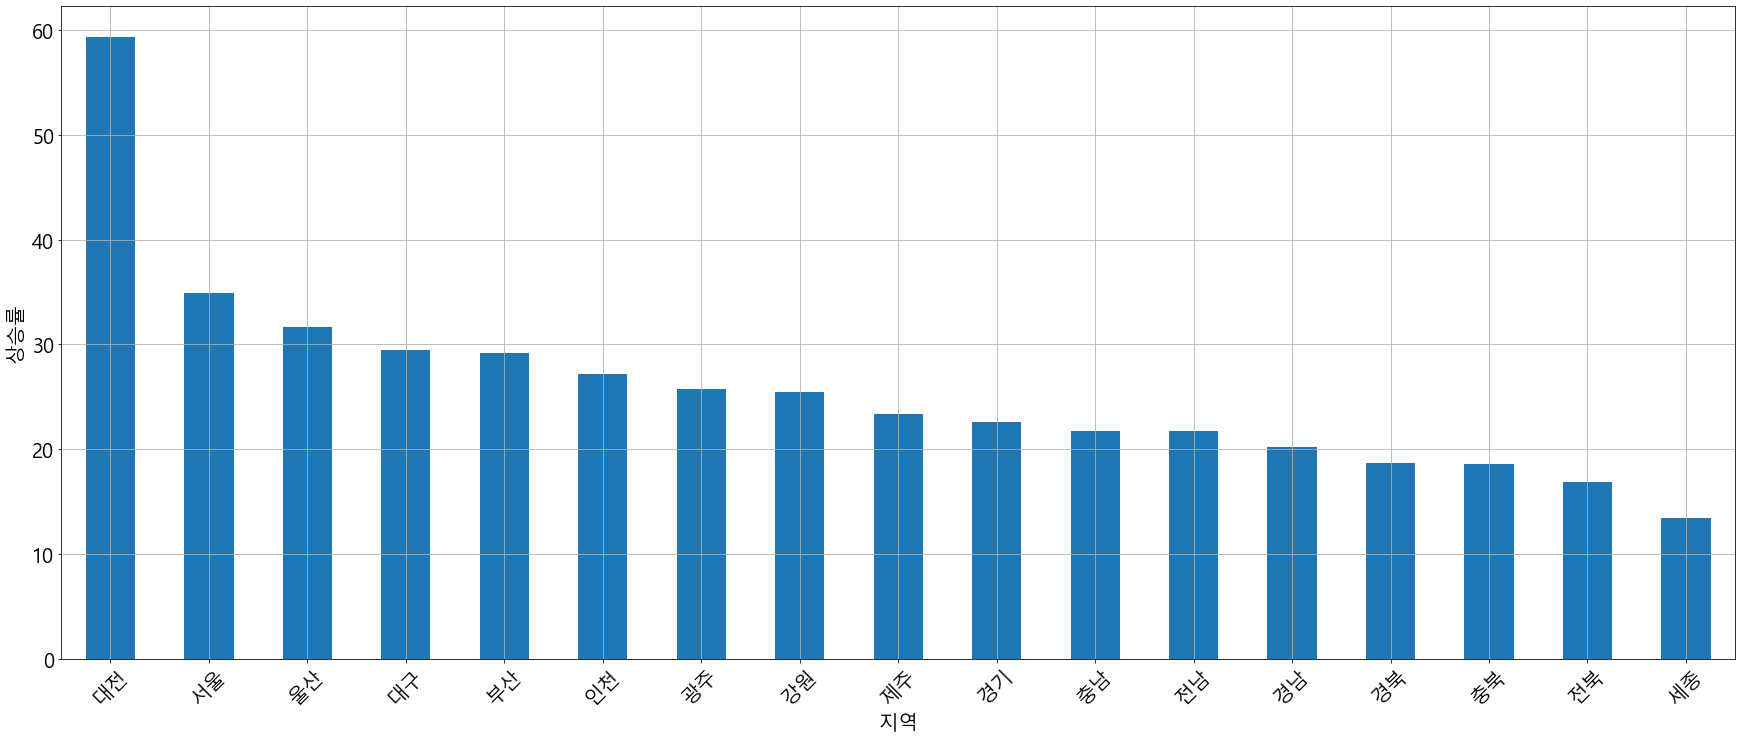

In [13]:
Three.plot(kind='bar', figsize=(30, 12),
              grid=True,rot=45,fontsize = 20)

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

# plt.title('코로나 전/후 관광소비액',fontsize = 20)
plt.xlabel("지역",fontsize = 20)
plt.ylabel("상승률",fontsize = 20)
plt.ylim()
plt.xlim()
# plt.legend(fontsize = 20)
plt.show()

C:\Users\nirae\AppData\Local\Temp\ipykernel_11740\2796740858.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


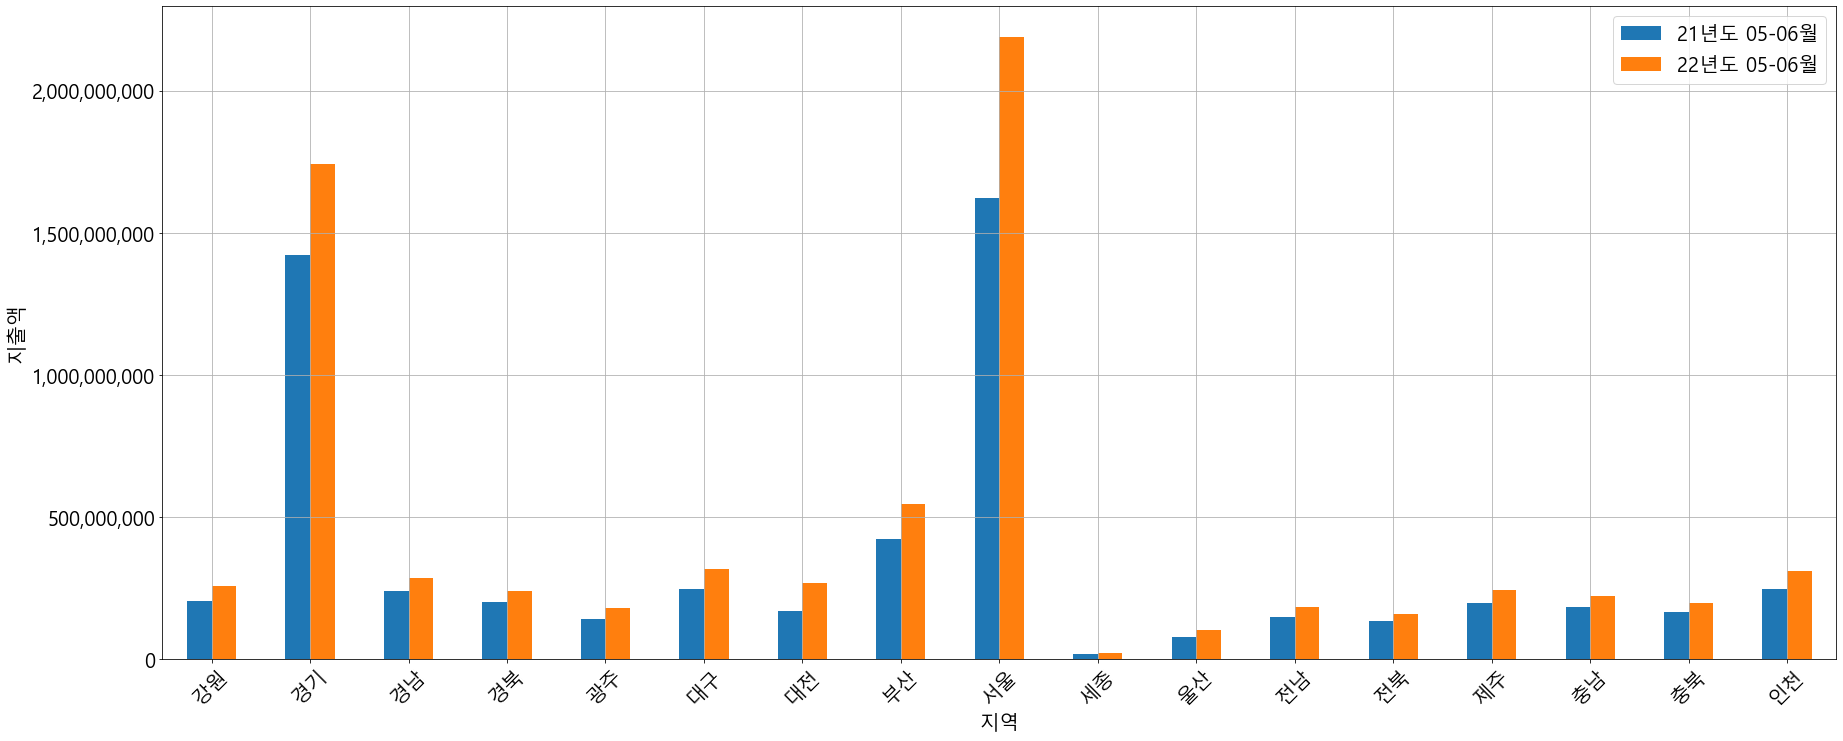

In [14]:
A_B.plot(kind='bar', figsize=(30, 12),
              grid=True,rot=45,fontsize = 20)

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

# plt.title('코로나 전/후 관광소비액',fontsize = 20)
plt.xlabel("지역",fontsize = 20)
plt.ylabel("지출액",fontsize = 20)
plt.ylim()
plt.xlim()
plt.legend(fontsize = 20)
plt.show()

In [15]:

A = DataExtract("인천_관광소비 추이.csv")
A_18 = A.total.loc[:,['18년도 지출액','19년도 지출액']]
A_18 = A_18.transpose().sum()
A_18 = A_18.unstack().sum()
# A_18 = A_18.add_prefix("전 ")

A_20 = A.simple.loc[:,['20년도 지출액','21년도 지출액']]
A_20 = A_20.transpose().sum()
A_20 = A_20.unstack().sum()
# A_20 = A_20.add_prefix()

A_18_20_ = pd.concat([A_18,A_20],axis = 1)
A_18_20_.columns = ['코로나 전 지출액','코로나 후 지출액']

A_18_20_ = A_18_20_.drop(['총소비'],axis = 'index')

AttributeError: 'DataExtract' object has no attribute 'total'

In [16]:
_21_5 = DataExtract("2021_전국_관광소비 추이.csv")
_21_5 = DataExtract._MultiIndexing_(_21_5.simple).unstack()
_21_5 = _21_5.loc[[5,6]].sum()
_21_5

_22_5 = DataExtract("2022_전국_관광소비 추이.csv")
_22_5 = DataExtract._MultiIndexing_(_22_5.simple).unstack()
_22_5 = _22_5.loc[[5,6]].sum()

_21_22_5_ = pd.concat([_21_5,_22_5],axis = 1)

_21_22_5_.columns = ['21년도 5월 6월 지출액','22년도 5월 6월 지출액']
_21_22_5_.reset_index(inplace = True)
_21_22_5_ = _21_22_5_.drop(['level_0'],axis = 'columns')
_21_22_5_ = _21_22_5_.groupby(['대분류'])
_21_22_5_ = _21_22_5_.first()
_21_22_5_ = _21_22_5_.drop(['총소비'],axis = 'index')
_21_22_5_

_21_22_5_1 = ((_22_5 - _21_5)/_21_5)*100
_21_22_5_1 = _21_22_5_1.reset_index()
_21_22_5_1 = _21_22_5_1.drop(['level_0'],axis = 'columns')
_21_22_5_1 = _21_22_5_1.groupby(['대분류'])
_21_22_5_1 = _21_22_5_1.first()
_21_22_5_1.columns = ['상승률']
_21_22_5_1.sort_values('상승률',ascending=False, inplace=True)

_21_22_5_

,21년도 5월 6월 지출액,22년도 5월 6월 지출액
대분류,,
골프장,404858725,475360394
관광기념품,12564751,17705247
관광유원시설,18738006,29585398
기타레저,40397606,52984127
기타숙박,113755053,133216685
대형쇼핑몰,1524753392,1869819239
레저용품쇼핑,365584799,407766323
렌터카,17320254,20193132
면세점,43340288,65668514


C:\Users\nirae\AppData\Local\Temp\ipykernel_11740\2040385880.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


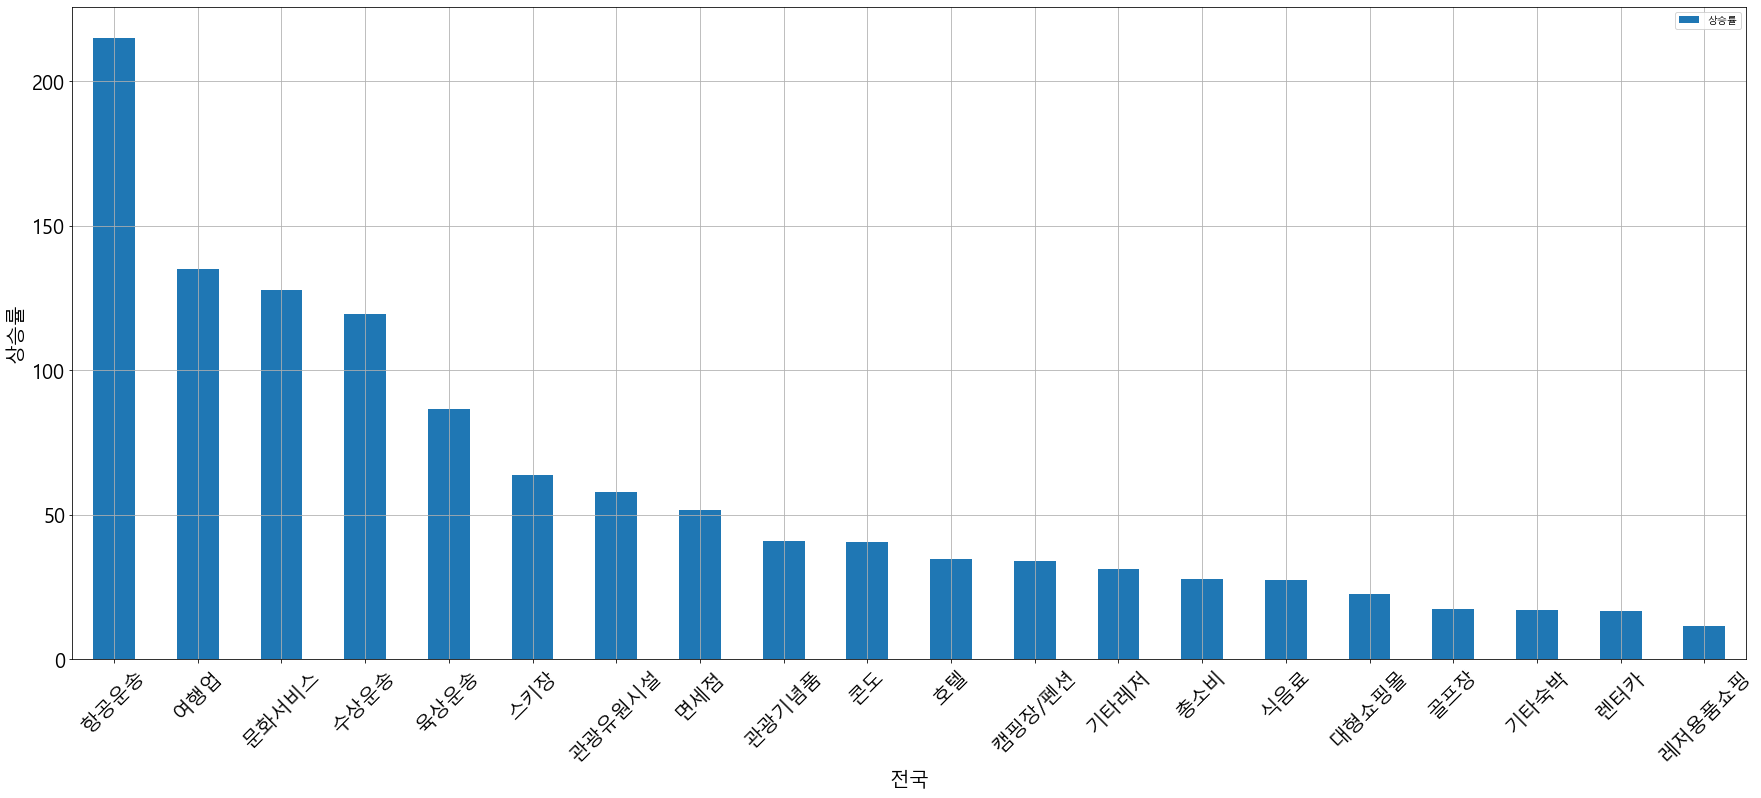

In [17]:
_21_22_5_1.plot(kind='bar', figsize=(30, 12),
              grid=True,rot=45,fontsize = 20)

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

# plt.title('코로나 전/후 관광소비액',fontsize = 20)
plt.xlabel("전국",fontsize = 20)
plt.ylabel("상승률",fontsize = 20)
plt.ylim()
plt.xlim()
# plt.legend(False)
plt.show()

C:\Users\nirae\AppData\Local\Temp\ipykernel_11740\601578369.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


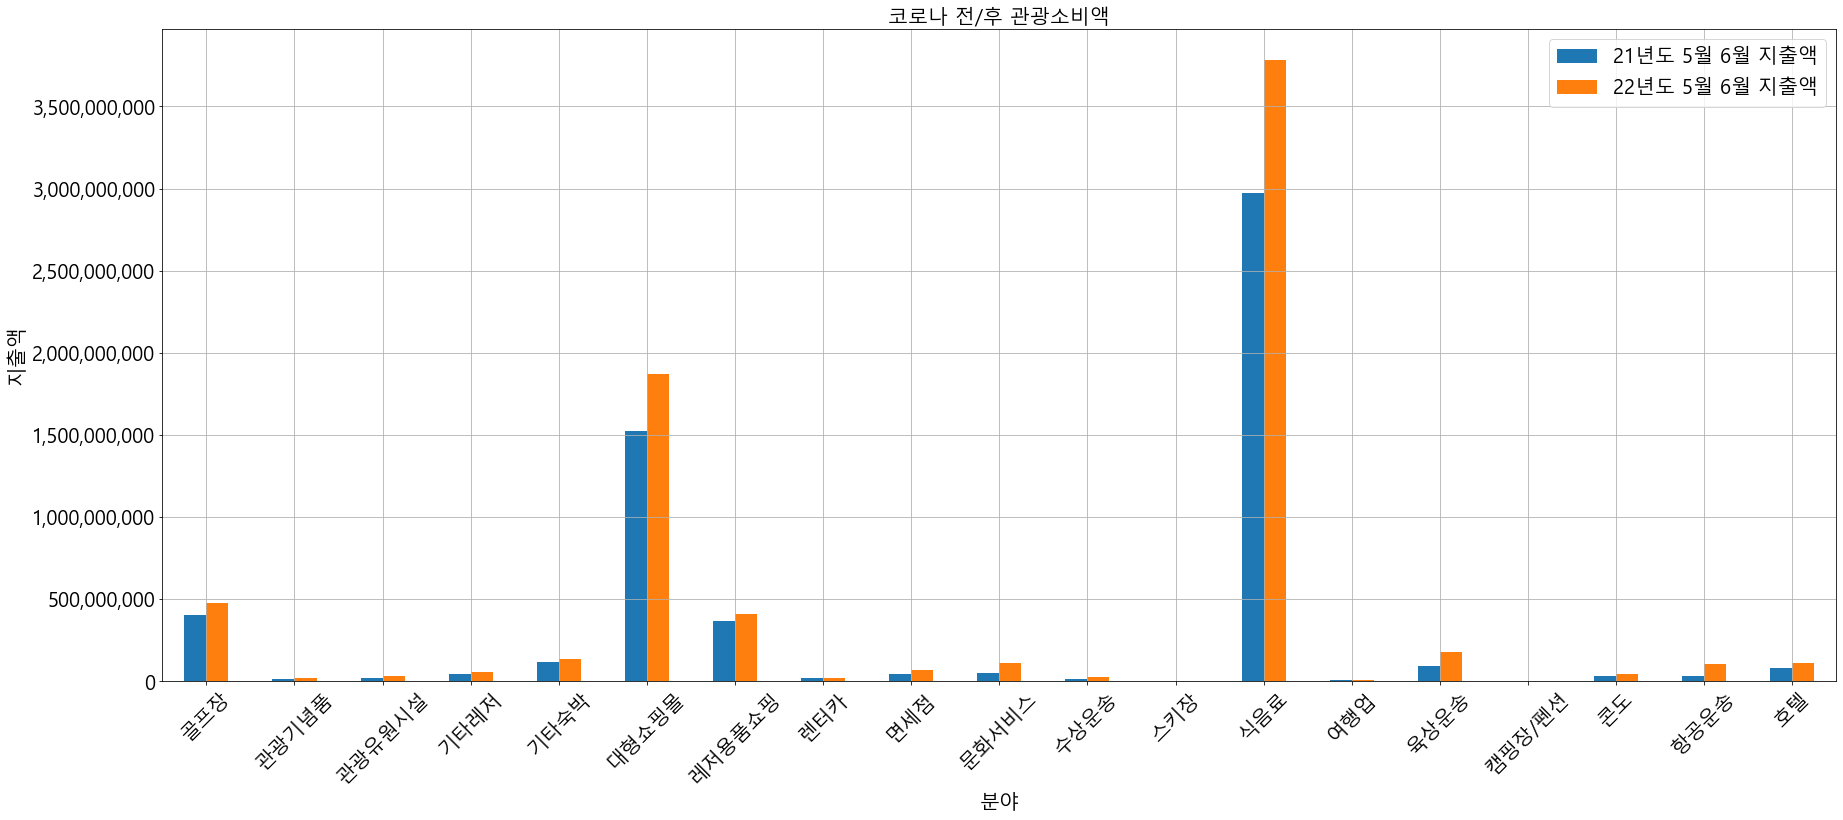

In [18]:
_21_22_5_.plot(kind='bar', figsize=(30, 12),
              grid=True,rot=45,fontsize = 20)

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.title('코로나 전/후 관광소비액',fontsize = 20)
plt.xlabel("분야",fontsize = 20)
plt.ylabel("지출액",fontsize = 20)
plt.ylim()
plt.xlim()
plt.legend(fontsize = 20)
plt.show()

In [ ]:
# 21년도 22년도 5월 6월 지역별 지출액 비고 추가
_total_spend_ = _LocationData_("총소비")
_18_19_ = _total_spend_ .loc[:,['18년도 지출액','19년도 지출액']]
_18_19_ = _18_19_ .transpose()
_18_19_ = _18_19_ .sum()

_20_21_ = _total_spend_.loc[:,['20년도 지출액','21년도 지출액']]
_20_21_ = _20_21_.transpose()
_20_21_ = _20_21_.sum()

_total_spend_5_6_ = _LocationData_mon_("총소비")
_21_56_ = _total_spend_5_6_
_21_56_
# _21_56_ = _21_56_.loc[:,[:]]

_22_ = _total_spend_.loc[:,['22년도 지출액']]
_22_ = _22_.transpose()
_22_ = _22_.sum()
_22_

A = pd.concat([_18_19_,_20_21_], axis = 1)
A.columns = ['코로나 전 총지출액','코로나 후 총지출액']

pd.options.display.float_format = '{:.0f}'.format

B = ((_18_19_-_20_21_)/_18_19_)*100
B = B.sort_values(ascending=False)

In [ ]:
A.plot(kind='bar', figsize=(30, 12),
              grid=True,rot=45,fontsize = 20)

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.title('코로나 전/후 관광지출액',fontsize = 20)
plt.xlabel("지역",fontsize = 20)
plt.ylabel("지출액",fontsize = 20)
plt.ylim()
plt.xlim()
plt.legend(fontsize = 20)
plt.show()

In [ ]:
B.plot(kind='bar', figsize=(30, 12),
              grid=True,rot=45,fontsize = 20)

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

# plt.title('코로나 전/후 관광소비액 하락율',fontsize = 20)
plt.xlabel("지역",fontsize = 20)
plt.ylabel("하락률(%)",fontsize = 20)
plt.ylim(0,100)
plt.xlim()
plt.show()

In [ ]:
#인천 업종별 코로나 전 후

A = DataExtract("인천_관광소비 추이.csv")
A_18 = A.simple.loc[:,['18년도 지출액','19년도 지출액']]
A_18 = A_18.transpose().sum()
A_18 = A_18.unstack().sum()
# A_18 = A_18.add_prefix("전 ")

A_20 = A.simple.loc[:,['20년도 지출액','21년도 지출액']]
A_20 = A_20.transpose().sum()
A_20 = A_20.unstack().sum()
# A_20 = A_20.add_prefix()

A_18_20_ = pd.concat([A_18,A_20],axis = 1)
A_18_20_.columns = ['코로나 전 지출액','코로나 후 지출액']

A_18_20_ = A_18_20_.drop(['총소비'],axis = 'index')


In [ ]:
#대전 업종별 코로나 전 후

B = DataExtract("대전_관광소비 추이.csv")
B_18 = B.simple.loc[:,['18년도 지출액','19년도 지출액']]
B_18 = B_18.transpose().sum()
B_18 = B_18.unstack().sum()
# A_18 = A_18.add_prefix("전 ")

B_20 = B.simple.loc[:,['20년도 지출액','21년도 지출액']]
B_20 = B_20.transpose().sum()
B_20 = B_20.unstack().sum()
# A_20 = A_20.add_prefix()

B_18_20_ = pd.concat([B_18,B_20],axis = 1)
B_18_20_.columns = ['코로나 전 지출액','코로나 후 지출액']

B_18_20_ = B_18_20_.drop(['총소비'],axis = 'index')

In [ ]:
B = DataExtract("전북_관광소비 추이.csv")
B_18 = B.simple.loc[:,['18년도 지출액','19년도 지출액']]
B_18 = B_18.transpose().sum()
B_18 = B_18.unstack().sum()
# A_18 = A_18.add_prefix("전 ")

B_20 = B.simple.loc[:,['20년도 지출액','21년도 지출액']]
B_20 = B_20.transpose().sum()
B_20 = B_20.unstack().sum()
# A_20 = A_20.add_prefix()

B_18_20_ = pd.concat([B_18,B_20],axis = 1)
B_18_20_.columns = ['코로나 전 지출액','코로나 후 지출액']

B_18_20_ = B_18_20_.drop(['총소비'],axis = 'index')

In [ ]:
B_18_20_.plot(kind='bar', figsize=(30, 12),
              grid=True,rot=45,fontsize = 20)

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

# plt.title('코로나 전/후 관광소비액 상승률',fontsize = 20)
plt.xlabel("강원",fontsize = 20)
plt.ylabel("지출액",fontsize = 20)
plt.ylim()
plt.xlim()
plt.legend(fontsize = 20)
plt.show()

In [ ]:
A_18_20_.plot(kind='bar', figsize=(30, 12),
              grid=True,rot=45,fontsize = 20)

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

# plt.title('코로나 전/후 관광소비액 상승률',fontsize = 20)
plt.xlabel("인천",fontsize = 20)
plt.ylabel("지출액",fontsize = 20)
plt.ylim()
plt.xlim()
plt.legend(fontsize = 20)
plt.show()

In [ ]:
D = DataExtract('전국_관광소비 추이.csv','총소비')
D = D.simple.unstack()
D_21 = D.loc[[5,6]]['21년도 지출액']

D_22 = D.loc[[5,6]]['22년도 지출액']

D_21_22_ = pd.concat([D_21,D_22], axis = 1)
D_21_22_.columns = ['21년 지출액','22년 지출액']
D_21_22_

In [ ]:
D_21_22_.plot(kind='bar', figsize=(30, 12),
              grid=True,rot=45,fontsize = 20)

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.title('코로나 전/후 관광소비액 상승률',fontsize = 20)
plt.xlabel("",fontsize = 20)
plt.ylabel("지출액",fontsize = 20)
plt.ylim()
plt.xlim()
plt.legend(fontsize = 20)
plt.show()

In [ ]:
ski = DataExtract('2018_강원_관광소비 추이.csv','스키장')
ski_G = DataExtract('2021_강원_관광소비 추이.csv','스키장')
ski.simple['기준년월'] = ski.simple['기준년월']%100
ski_G.simple['기준년월'] = ski_G.simple['기준년월']%100
ski.simple = ski.simple.groupby(['기준년월'])
ski_G.simple = ski_G.simple.groupby(['기준년월'])
ski.simple = ski.simple.first()
ski_G.simple = ski_G.simple.first()


ski = pd.concat([ski.simple,ski_G.simple],axis = 1)

ski = ski.drop(['중분류'],axis = 'columns')
ski.columns = ['18년 강원도 스키장 지출액','21년 강원도 스키장 지출액']

ski.plot.bar(figsize=(30, 12),
              grid=True,rot=45,fontsize = 20)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.title('강원도 스키장 지출액',fontsize = 20)
plt.xlabel("월",fontsize = 20)
plt.ylabel("지출액",fontsize = 20)
plt.ylim()
plt.xlim()
plt.legend(fontsize = 20)
plt.show()
ski

In [19]:
#(2022-09-07) 대전 업종별 지출액 상승률 비교
_21_5_da = DataExtract("2021_대전_관광소비 추이.csv")
_21_5_da = DataExtract._MultiIndexing_(_21_5_da.simple).unstack()
_21_5_da = _21_5_da.loc[[5,6]].sum()
_21_5_da

_22_5_da = DataExtract("2022_대전_관광소비 추이.csv")
_22_5_da = DataExtract._MultiIndexing_(_22_5_da.simple).unstack()
_22_5_da = _22_5_da.loc[[5,6]].sum()

_21_22_5_da = pd.concat([_21_5_da,_22_5_da],axis = 1)

_21_22_5_da.columns = ['21년도 5월 6월 지출액','22년도 5월 6월 지출액']
_21_22_5_da.reset_index(inplace = True)
_21_22_5_da = _21_22_5_da.drop(['level_0'],axis = 'columns')
_21_22_5_da = _21_22_5_da.groupby(['중분류'])
_21_22_5_da = _21_22_5_da.first()
_21_22_5_da = _21_22_5_da.drop(['총소비','수상운송'],axis = 'index')
_21_22_5_da



_21_22_5_1_da = ((_22_5_da- _21_5_da)/_21_5_da)*100
_21_22_5_1_da = _21_22_5_1_da.reset_index()
_21_22_5_1_da = _21_22_5_1_da.drop(['level_0'],axis = 'columns')
_21_22_5_1_da = _21_22_5_1_da.groupby(['중분류'])
_21_22_5_1_da = _21_22_5_1_da.first()
_21_22_5_1_da = _21_22_5_1_da.drop(['총소비','수상운송'],axis = 'index')
_21_22_5_1_da.columns = ['상승률']
_21_22_5_1_da.sort_values('상승률',ascending=False, inplace=True)



C:\Users\nirae\AppData\Local\Temp\ipykernel_11740\1495671576.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


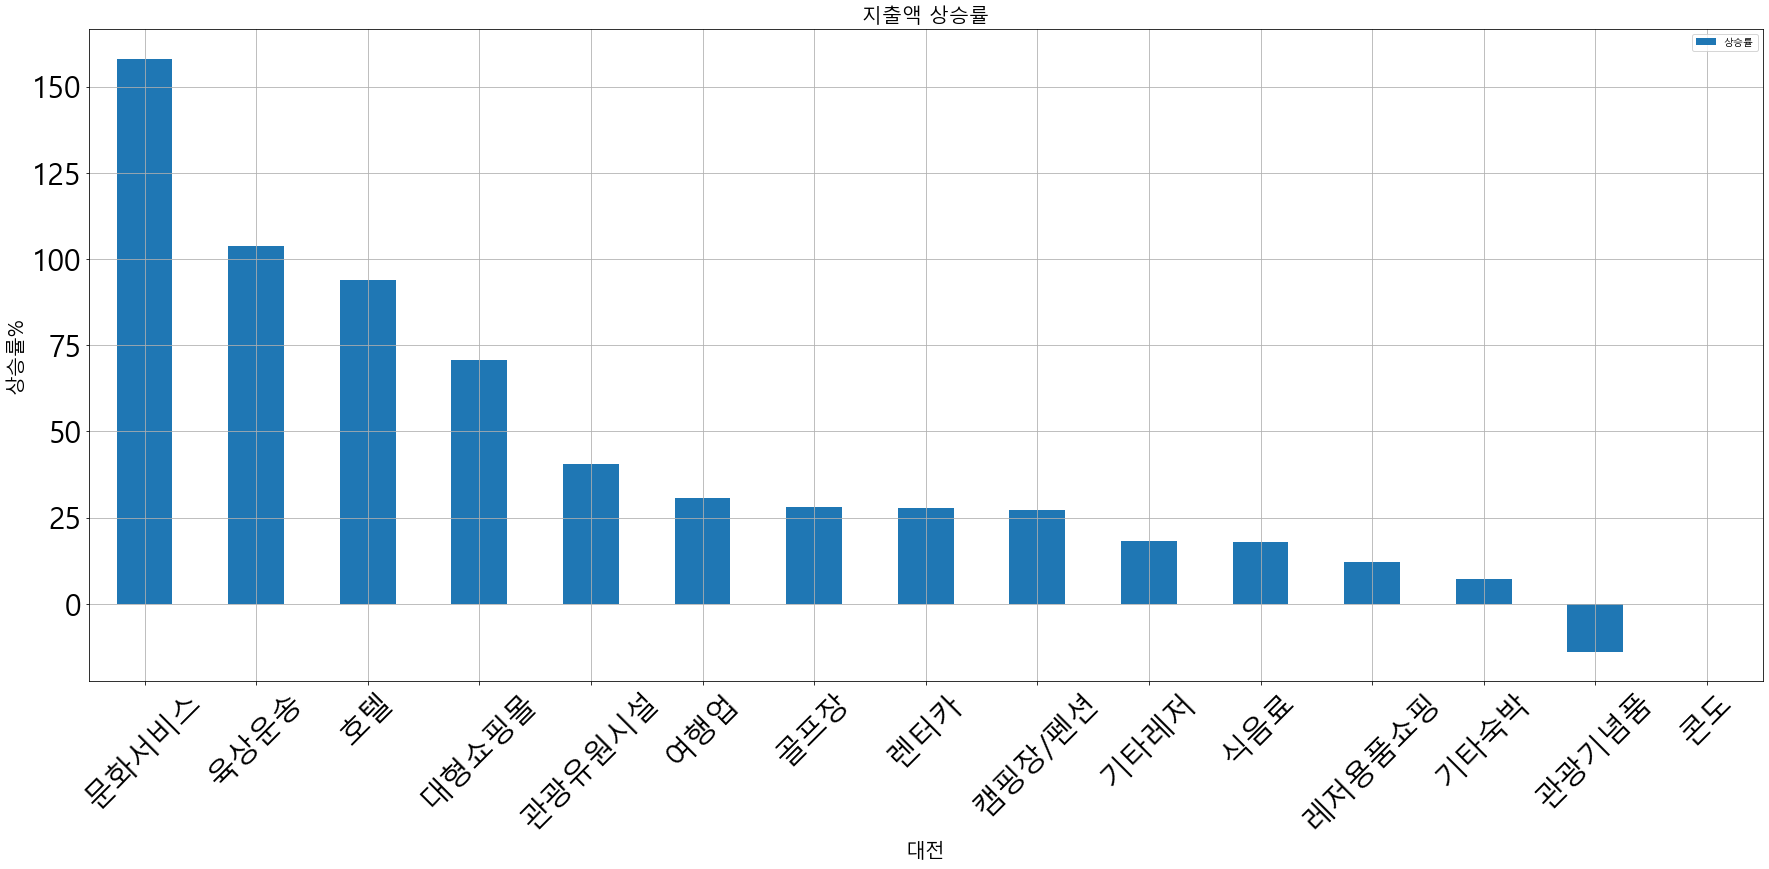

In [20]:
_21_22_5_1_da.plot(kind='bar', figsize=(30, 12),
              grid=True,rot=45,fontsize = 30)

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.title('지출액 상승률',fontsize = 20)
plt.xlabel("대전",fontsize = 20)
plt.ylabel("상승률%",fontsize = 20)
plt.ylim()
plt.xlim()
# plt.legend(False)
plt.show()

In [ ]:
#서울 업종별 지출액 상승률 비교
_21_5_se = DataExtract("2021_서울_관광소비 추이.csv")
_21_5_se = DataExtract._MultiIndexing_(_21_5_se.simple).unstack()
_21_5_se = _21_5_se.loc[[5,6]].sum()
_21_5_se

_22_5_se = DataExtract("2022_서울_관광소비 추이.csv")
_22_5_se = DataExtract._MultiIndexing_(_22_5_se.simple).unstack()
_22_5_se = _22_5_se.loc[[5,6]].sum()

_21_22_5_se = pd.concat([_21_5_se,_22_5_se],axis = 1)

_21_22_5_se.columns = ['21년도 5월 6월 지출액','22년도 5월 6월 지출액']
_21_22_5_se.reset_index(inplace = True)
_21_22_5_se = _21_22_5_se.drop(['level_0'],axis = 'columns')
_21_22_5_se = _21_22_5_se.groupby(['중분류'])
_21_22_5_se = _21_22_5_se.first()
_21_22_5_se = _21_22_5_se.drop(['총소비'],axis = 'index')
_21_22_5_se

_21_22_5_1_se = ((_22_5_se-_21_5_se)/_21_5_se)*100
_21_22_5_1_se = _21_22_5_1_se.reset_index()
_21_22_5_1_se = _21_22_5_1_se.drop(['level_0'],axis = 'columns')
_21_22_5_1_se = _21_22_5_1_se.groupby(['중분류'])
_21_22_5_1_se = _21_22_5_1_se.first()
_21_22_5_1_se = _21_22_5_1_se.drop(['총소비'],axis = 'index')
_21_22_5_1_se.columns = ['상승률']
_21_22_5_1_se.sort_values('상승률',ascending=False, inplace=True)



In [ ]:
_21_22_5_1_se.plot(kind='bar', figsize=(30, 12),
              grid=True,rot=45,fontsize = 30)

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.title('지출액 상승률',fontsize = 20)
plt.xlabel("서울",fontsize = 20)
plt.ylabel("상승률%",fontsize = 20)
plt.ylim()
plt.xlim()
#plt.legend(False)
plt.show()